In [1]:
# imports and function definitions
import numpy as np
import sympy as sym
from scipy.integrate import solve_bvp # solve boundary value problem
from scipy.integrate import solve_ivp # solve initial value problem
from scipy.optimize import minimize
from scipy.linalg import norm
import math
pi = math.pi
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import Image
import math

In [2]:
nt = 101
T = 1
dt = T/(nt-1)
time = np.linspace(-1,T,nt)

In [3]:
def dynamics_2d(t, q, u):
    q1, q2, q3 = q 
    dq1dt = np.cos(q3)
    dq2dt = np.sin(q3)
    dq3dt = u(t)

    dqdt = [dq1dt, dq2dt, dq3dt]
    return dqdt

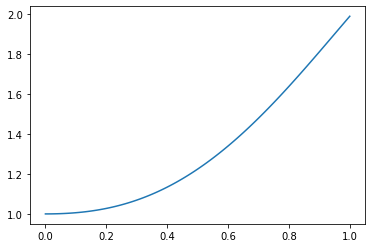

In [4]:
### desired initial trajectory y = x^2, should be a 
q1 = np.linspace(0,T,nt)
# q3 = np.random.normal(0,0.01,nt)
q3 = q1**2 - np.sin(q1)
q2 = q1**2 + np.cos(q3)

plt.plot(q1,q2)

In [5]:
q0_flatten1d = np.vstack((q1[1],q2[1],q3[1])).flatten()
q0_flatten1d

array([ 0.01      ,  1.000051  , -0.00989983])

In [6]:
u = np.zeros(len(q1))
for i in range(len(q1)-1):
    if i == 0:
        u[0] = 0
    else:
        u[i] = q3[i+1] - q3[i]  
u

array([ 0.        , -0.00969883, -0.00949683, -0.00929383, -0.00908984,
       -0.00888484, -0.00867884, -0.00847185, -0.00826386, -0.00805487,
       -0.00784488, -0.00763391, -0.00742194, -0.00720897, -0.00699502,
       -0.00678007, -0.00656414, -0.00634722, -0.00612932, -0.00591044,
       -0.00569057, -0.00546972, -0.0052479 , -0.0050251 , -0.00480133,
       -0.00457659, -0.00435088, -0.00412421, -0.00389658, -0.00366798,
       -0.00343843, -0.00320792, -0.00297647, -0.00274406, -0.00251072,
       -0.00227643, -0.0020412 , -0.00180504, -0.00156795, -0.00132993,
       -0.00109099, -0.00085113, -0.00061035, -0.00036866, -0.00012607,
        0.00011743,  0.00036182,  0.00060711,  0.00085329,  0.00110035,
        0.00134829,  0.00159711,  0.0018468 ,  0.00209735,  0.00234876,
        0.00260103,  0.00285415,  0.00310811,  0.00336291,  0.00361855,
        0.00387501,  0.0041323 ,  0.0043904 ,  0.00464932,  0.00490904,
        0.00516955,  0.00543086,  0.00569296,  0.00595584,  0.00

<ipython-input-7-2294c9ae4323>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


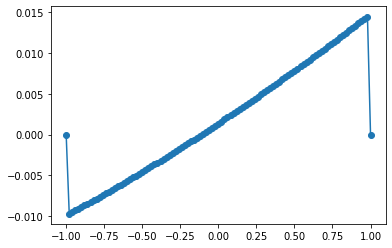

In [7]:
from matplotlib.pyplot import subplots
from numpy import linspace, random, sin, cos
from scipy import interpolate

# fit spline
spl = interpolate.InterpolatedUnivariateSpline(time, u)
fitx = linspace(-1, time.max(), 100)

fig, ax = subplots()
ax.scatter(time, u)

ax.plot(fitx, spl(fitx))
fig.show()

In [8]:
spl(0.8)

array(0.01192317)

In [9]:
sim = solve_ivp(lambda t, y: dynamics_2d(t,y,spl), [time[0], time[-1]], q0_flatten1d, t_eval=time)

In [10]:
display(sim.y[0])

array([0.01      , 0.02999901, 0.04999799, 0.06999693, 0.08999582,
       0.10999469, 0.12999351, 0.14999229, 0.16999104, 0.18998975,
       0.20998842, 0.22998706, 0.24998566, 0.26998422, 0.28998275,
       0.30998125, 0.32997971, 0.34997814, 0.36997654, 0.3899749 ,
       0.40997324, 0.42997155, 0.44996983, 0.46996808, 0.4899663 ,
       0.5099645 , 0.52996267, 0.54996082, 0.56995895, 0.58995706,
       0.60995514, 0.62995321, 0.64995126, 0.66994929, 0.68994731,
       0.70994531, 0.7299433 , 0.74994128, 0.76993924, 0.7899372 ,
       0.80993515, 0.82993309, 0.84993103, 0.86992897, 0.8899269 ,
       0.90992484, 0.92992277, 0.94992071, 0.96991865, 0.9899166 ,
       1.00991455, 1.02991251, 1.04991048, 1.06990846, 1.08990645,
       1.10990446, 1.12990248, 1.14990051, 1.16989857, 1.18989664,
       1.20989473, 1.22989284, 1.24989097, 1.26988913, 1.28988731,
       1.30988552, 1.32988376, 1.34988203, 1.36988032, 1.38987865,
       1.40987701, 1.4298754 , 1.44987383, 1.46987229, 1.48987

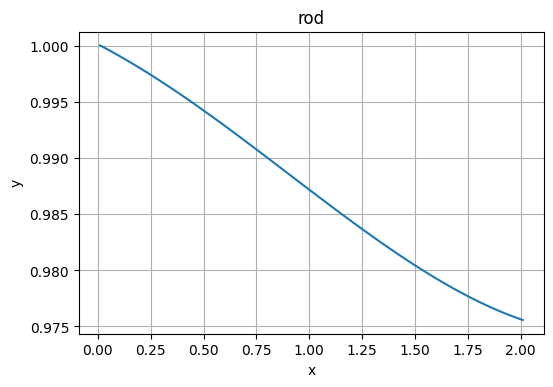

In [11]:
plt.figure(dpi=100,facecolor='w')
plt.plot(sim.y[0],sim.y[1])
axes = plt.gca()
# axes.set_xlim([-1.,1])
# axes.set_ylim([0.8,2])
plt.title('rod')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [12]:
u0 = u
sim.y.shape
u0 = u0.reshape((1,nt))
state_initials = np.vstack((sim.y, u0))
print(sim.y[0,-1])
print(sim.y[1,-1])
print(sim.y[2,-1])

2.0098460558730795
0.9755791856213046
-0.0065006650766584115


In [13]:
P = 500
xd, yd, zd = q1[-1], q2[-1], q3[-1]
print(xd, yd, zd)

1.0 1.9874605698734804 0.1585290151921035


In [14]:
def cost_function(state_initials, nt, dt, P, xd, yd, zd):
    state_initials = state_initials.reshape((4,nt))
    running_cost = np.zeros((1,nt))
    # print(state_initials.shape)
    for i in range(nt):
        running_cost[0, i] = dt*0.5*state_initials[-1,i]
    final_cost = P*(abs(state_initials[0,-1]-xd) + abs(state_initials[1,-1]-yd) + abs(state_initials[2,-1]-zd))
    cost = np.sum(running_cost) + final_cost
    return cost

In [15]:
def system_dynamics(state_initials):
    P = 600
    nt = 101
    dt = 1/(nt-1)
    xd = 1.0
    yd = 1.9874605698734804
    zd = 0.1585290151921035
    state_initials = state_initials.reshape((4,nt))
    q = state_initials[0:3,:]
    u = state_initials[-1,:]
    u = u.reshape(1,nt)
    error = np.zeros((1, 4*nt))
    final_weight = 1
    initial_weight = 1
    j = 0
    
    for i in range(nt-1):
        error[:,j] = q[0, i+1] - (q[0,i]) + dt*np.cos(q[2,i])
        error[:,j+1] = q[1, i+1] - (q[1,i]) + dt*np.sin(q[2,i])
        error[:,j+2] = q[2, i+1] - (q[2,i]) + dt*u[:,i]
        
        j = j+3
        
    error[:,j] = inital_weight*(q[0,0] - state_initials[0, 0])
    error[:,j+1] = inital_weight*(q[1,0] - state_initials[0, 0]) 
    error[:,j+2] = inital_weight*(q[2,0] - state_initials[0, 0])
    
    pos_error = np.absolute(error)
    
        

    return pos_error.flatten()

In [16]:
con = ({'type': 'eq', 'fun': system_dynamics})
sol = minimize(cost_function, state_initials, args=(nt, dt,P, xd, yd, zd), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=con, tol=1e-3, callback=None, options=None)

NameError: name 'inital_weight' is not defined

In [ ]:
opt = sol.x.reshape((4,nt))
plt.figure(dpi=100,facecolor='w')
plt.plot(opt[0,:],opt[1,:])
axes = plt.gca()
# axes.set_xlim([-1,1])
# axes.set_ylim([-5,5])
plt.title('Optimized Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
print("x = ", opt[0,-1], ", y = ", opt[1,-1], ", theta = ", opt[2,-1]) 
print("xd = ", xd, ", yd = ", yd, ", thetad = ", zd) 